In [3]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [1]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [2]:
for row_index in range(1,20): #reading first columns
    RsR0, CO, H2, LPG, CH4, Alcohol = sheetMQ7.row_values(row_index, start_colx=0, end_colx=6)
    print(RsR0, "	", LPG, "	", H2, "	", CH4, "	", CO, "	", Alcohol)
 

0.01 	  	  	  	  	 
0.02 	  	  	  	  	 
0.03 	  	  	  	  	 
0.04 	  	  	  	  	 
0.05 	  	 4000.0 	  	  	 
0.06 	  	  	  	  	 
0.07 	  	  	  	  	 
0.08 	  	  	  	  	 
0.09 	  	  	  	 3000.0 	 
0.1 	  	  	  	  	 
0.2 	  	  	  	  	 
0.3 	  	 400.0 	  	  	 
0.4 	  	  	  	 400.0 	 
0.5 	  	  	  	  	 
0.6 	  	  	  	  	 
0.7 	  	  	  	  	 
0.8 	  	 100.0 	  	  	 
0.9 	  	  	  	  	 
1.0 	  	  	  	 100.0 	 


In [7]:
x_MQ7 = sheetMQ7.col_values(0)[2:]
MQ7_CO = sheetMQ7.col_values(1)[2:]
MQ7_H2 = sheetMQ7.col_values(2)[2:]
MQ7_LPG = sheetMQ7.col_values(3)[2:]
MQ7_CH4 = sheetMQ7.col_values(4)[2:]
MQ7_Alcohol = sheetMQ7.col_values(5)[2:]

In [8]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [9]:
MQ7_H2 =zero_to_nan(MQ7_H2)
MQ7_LPG =zero_to_nan(MQ7_LPG)
MQ7_CH4 =zero_to_nan(MQ7_CH4)
MQ7_CO =zero_to_nan(MQ7_CO)
MQ7_Alcohol =zero_to_nan(MQ7_Alcohol)

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataH2 = {'RsRo': x_MQ7, 'H2': MQ7_H2}
dataLPG = {'RsRo': x_MQ7, 'LPG': MQ7_LPG}
dataCH4 = {'RsRo': x_MQ7, 'CH4': MQ7_CH4}
dataCO = {'RsRo': x_MQ7, 'CO': MQ7_CO}
dataALcohol = {'RsRo': x_MQ7, 'Alcohol': MQ7_Alcohol}

dfMQ7_H2 = pd.DataFrame(dataH2)
dfMQ7_LPG = pd.DataFrame(dataLPG)
dfMQ7_CH4 = pd.DataFrame(dataCH4)
dfMQ7_CO = pd.DataFrame(dataCO)
dfMQ7_Alcohol = pd.DataFrame(dataALcohol)

dfMQ7_H2['H2'] = pd.to_numeric(dfMQ7_H2['H2'])
dfMQ7_LPG['LPG'] = pd.to_numeric(dfMQ7_LPG['LPG'])
dfMQ7_CH4['CH4'] = pd.to_numeric(dfMQ7_CH4['CH4'])
dfMQ7_CO['CO'] = pd.to_numeric(dfMQ7_CO['CO'])
dfMQ7_Alcohol['Alcohol'] = pd.to_numeric(dfMQ7_Alcohol['Alcohol'])

dfMQ7_H2['H2'] = dfMQ7_H2['H2'].replace('',None, regex=True)
dfMQ7_LPG['LPG'] = dfMQ7_LPG['LPG'].replace('',None, regex=True)
dfMQ7_CH4['CH4'] = dfMQ7_CH4['CH4'].replace('',None, regex=True)
dfMQ7_CO['CO'] = dfMQ7_CO['CO'].replace('',None, regex=True)
dfMQ7_Alcohol['Alcohol'] = dfMQ7_Alcohol['Alcohol'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ7_LPG.RsRo.apply(lambda x: [x]).tolist()

In [11]:
#Model and train H2
dataset2TrainH2 = dfMQ7_H2.copy()
dataset2TrainH2.dropna(inplace=True)
X_trainH2 = dataset2TrainH2.RsRo.apply(lambda x: [x]).tolist()
y_trainH2 = dataset2TrainH2['H2'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainH2, y_trainH2)
#Predict
H2_Predicted = model.predict(X_Predict)
#save into MQ2
MQ7_H2 = H2_Predicted


In [12]:
#Model and train LPG
dataset2TrainLPG = dfMQ7_LPG.copy()
dataset2TrainLPG.dropna(inplace=True)
X_trainLPG = dataset2TrainLPG.RsRo.apply(lambda x: [x]).tolist()
y_trainLPG = dataset2TrainLPG['LPG'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainLPG, y_trainLPG)
#Predict
LPG_Predicted = model.predict(X_Predict)
#save into MQ2
MQ7_LPG = LPG_Predicted

In [13]:
#Model and train CH4
dataset2TrainCH4 = dfMQ7_CH4.copy()
dataset2TrainCH4.dropna(inplace=True)
X_trainCH4 = dataset2TrainCH4.RsRo.apply(lambda x: [x]).tolist()
y_trainCH4 = dataset2TrainCH4['CH4'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCH4, y_trainCH4)
#Predict
CH4_Predicted = model.predict(X_Predict)
#save into MQ2
MQ7_CH4 = CH4_Predicted

In [14]:
#Model and train CO
dataset2TrainCO = dfMQ7_CO.copy()
dataset2TrainCO.dropna(inplace=True)
X_trainCO = dataset2TrainCO.RsRo.apply(lambda x: [x]).tolist()
y_trainCO = dataset2TrainCO['CO'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO, y_trainCO)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ7_CO = CO_Predicted

In [15]:
#Model and train Alcohol
dataset2TrainAlcohol = dfMQ7_Alcohol.copy()
dataset2TrainAlcohol.dropna(inplace=True)
X_trainAlcohol = dataset2TrainAlcohol.RsRo.apply(lambda x: [x]).tolist()
y_trainAlcohol = dataset2TrainAlcohol['Alcohol'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAlcohol, y_trainAlcohol)
#Predict
Alcohol_Predicted = model.predict(X_Predict)
#save into MQ2
MQ7_Alcohol = Alcohol_Predicted

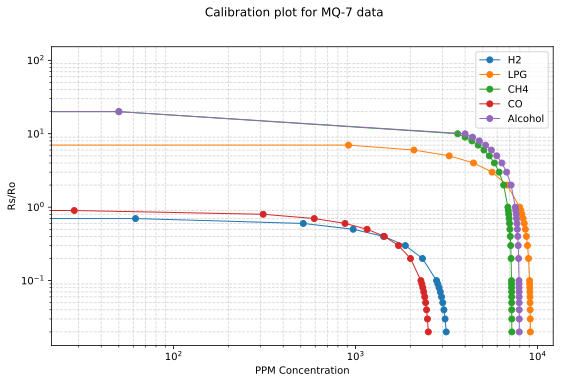

In [17]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ7_H2, x_MQ7, marker='o', linewidth=1, label='H2')
plt.plot(MQ7_LPG, x_MQ7, marker='o', linewidth=1, label='LPG')
plt.plot(MQ7_CH4, x_MQ7, marker='o', linewidth=1, label='CH4')
plt.plot(MQ7_CO, x_MQ7, marker='o', linewidth=1, label='CO')
plt.plot(MQ7_Alcohol, x_MQ7, marker='o', linewidth=1, label='Alcohol')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-7 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ7.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ7.png')
plt.savefig('MQ7.eps', format = 'eps', dpi = 1200)